In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv("forestfires.csv")
raw_data.head() 

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
df = raw_data.copy() #Removing the dummies at this time
df.drop(df.columns[11:30],axis=1,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [4]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


<AxesSubplot:>

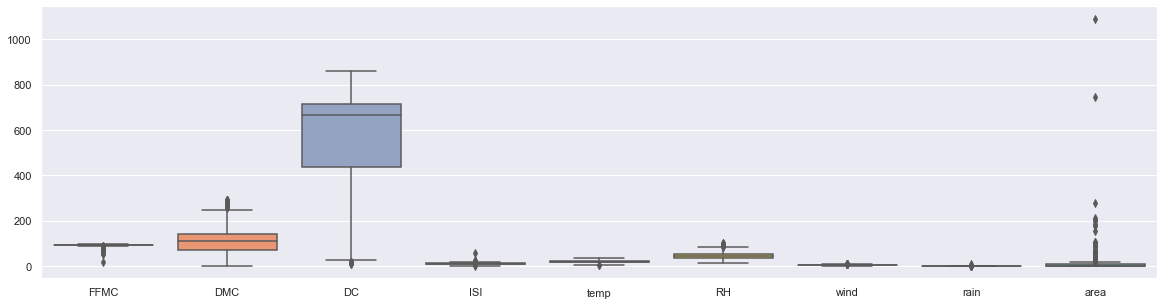

In [5]:
sns.set(rc={'figure.figsize':(20,5)})
sns.boxplot(data=df, orient="v", palette="Set2") 

# Feature Analysis

In [6]:
df.month.value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [7]:
df.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df.month= label_encoder.fit_transform(df.month) 
df.day= label_encoder.fit_transform(df.day) 
 
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


# Removing Bias in the Dataset

In [9]:
from imblearn.combine import SMOTETomek
from collections import Counter

resamp = df.copy()

a = resamp.iloc[:,:-1]
b = resamp.iloc[:,-1]

print(Counter(b))

smt = SMOTETomek(sampling_strategy = 'auto')
a, b = smt.fit_resample(a, b)

print(Counter(b)) #removed bias in dataset

Counter({'small': 378, 'large': 139})
Counter({'small': 370, 'large': 370})


# Train | Split dataset


In [10]:
X = a
Y = b
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

Text(0.5, 1.0, 'T-Sine Visualization of forest-fire dataset')

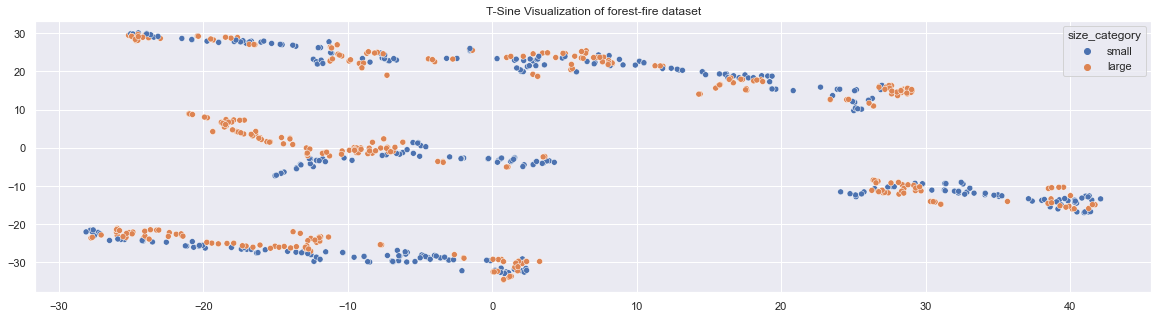

In [11]:
from sklearn.manifold import TSNE

data_tsne_pca = TSNE(n_components=2).fit_transform(a)
sns.scatterplot(data_tsne_pca[:,0],data_tsne_pca[:,1],hue=b, palette="deep").set_title('T-Sine Visualization of forest-fire dataset')


# Support Vector Machine Model

In [12]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1000)
model.fit(X_train, y_train)

SVC(C=1000, kernel='linear')

In [16]:
from sklearn.metrics import confusion_matrix,classification_report
def report_model(model):
    model_preds = model.predict(X_test)
    print(confusion_matrix(y_test,model_preds))
    print(classification_report(y_test,model_preds))

In [17]:
report_model(model)

[[110   0]
 [  0 112]]
              precision    recall  f1-score   support

       large       1.00      1.00      1.00       110
       small       1.00      1.00      1.00       112

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222



In [18]:
model1 = SVC(kernel='poly', C=100)
model1.fit(X_train, y_train)
report_model(model1) 


[[ 94  16]
 [  2 110]]
              precision    recall  f1-score   support

       large       0.98      0.85      0.91       110
       small       0.87      0.98      0.92       112

    accuracy                           0.92       222
   macro avg       0.93      0.92      0.92       222
weighted avg       0.93      0.92      0.92       222



In [19]:
model2 = SVC(kernel='poly', C=1000)
model2.fit(X_train, y_train)
report_model(model2)

[[ 97  13]
 [  2 110]]
              precision    recall  f1-score   support

       large       0.98      0.88      0.93       110
       small       0.89      0.98      0.94       112

    accuracy                           0.93       222
   macro avg       0.94      0.93      0.93       222
weighted avg       0.94      0.93      0.93       222



In [20]:
model3 = SVC(kernel='poly',gamma=0.5, C=1000)
model3.fit(X_train, y_train)
report_model(model3)

[[106   4]
 [  2 110]]
              precision    recall  f1-score   support

       large       0.98      0.96      0.97       110
       small       0.96      0.98      0.97       112

    accuracy                           0.97       222
   macro avg       0.97      0.97      0.97       222
weighted avg       0.97      0.97      0.97       222



# GridSearch CV

In [21]:
from sklearn.model_selection import GridSearchCV

grid_model = SVC()
param_grid = [{'kernel':['rbf','poly','linear','sigmoid'],'gamma':[50,5,10,0.5],'C':[1000,600,200,100,15,10,0.1,0.001] }]
gsv = GridSearchCV(grid_model,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1000, 600, 200, 100, 15, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5],
                          'kernel': ['rbf', 'poly', 'linear', 'sigmoid']}])

In [22]:
gsv.best_params_ , gsv.best_score_ 

({'C': 0.1, 'gamma': 50, 'kernel': 'linear'}, 0.9923076923076923)

# Final SVM Model

In [23]:
model_fnl = SVC(kernel='linear',gamma=50, C=0.001)
model_fnl.fit(X_train, y_train)
report_model(model_fnl)

[[109   1]
 [  3 109]]
              precision    recall  f1-score   support

       large       0.97      0.99      0.98       110
       small       0.99      0.97      0.98       112

    accuracy                           0.98       222
   macro avg       0.98      0.98      0.98       222
weighted avg       0.98      0.98      0.98       222

